In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
all_df = pd.read_csv('TrainDataset2024.csv', index_col = False)
all_df.head()
len(all_df.index)

400

In [3]:
X = all_df.drop('ID', axis=1)
index = X[X["pCR (outcome)"] == 999].index
X.drop(index, inplace=True)


imputer = SimpleImputer(missing_values=999, strategy="median")
imputer.set_output(transform="pandas")
X = imputer.fit_transform(X)

<Axes: >

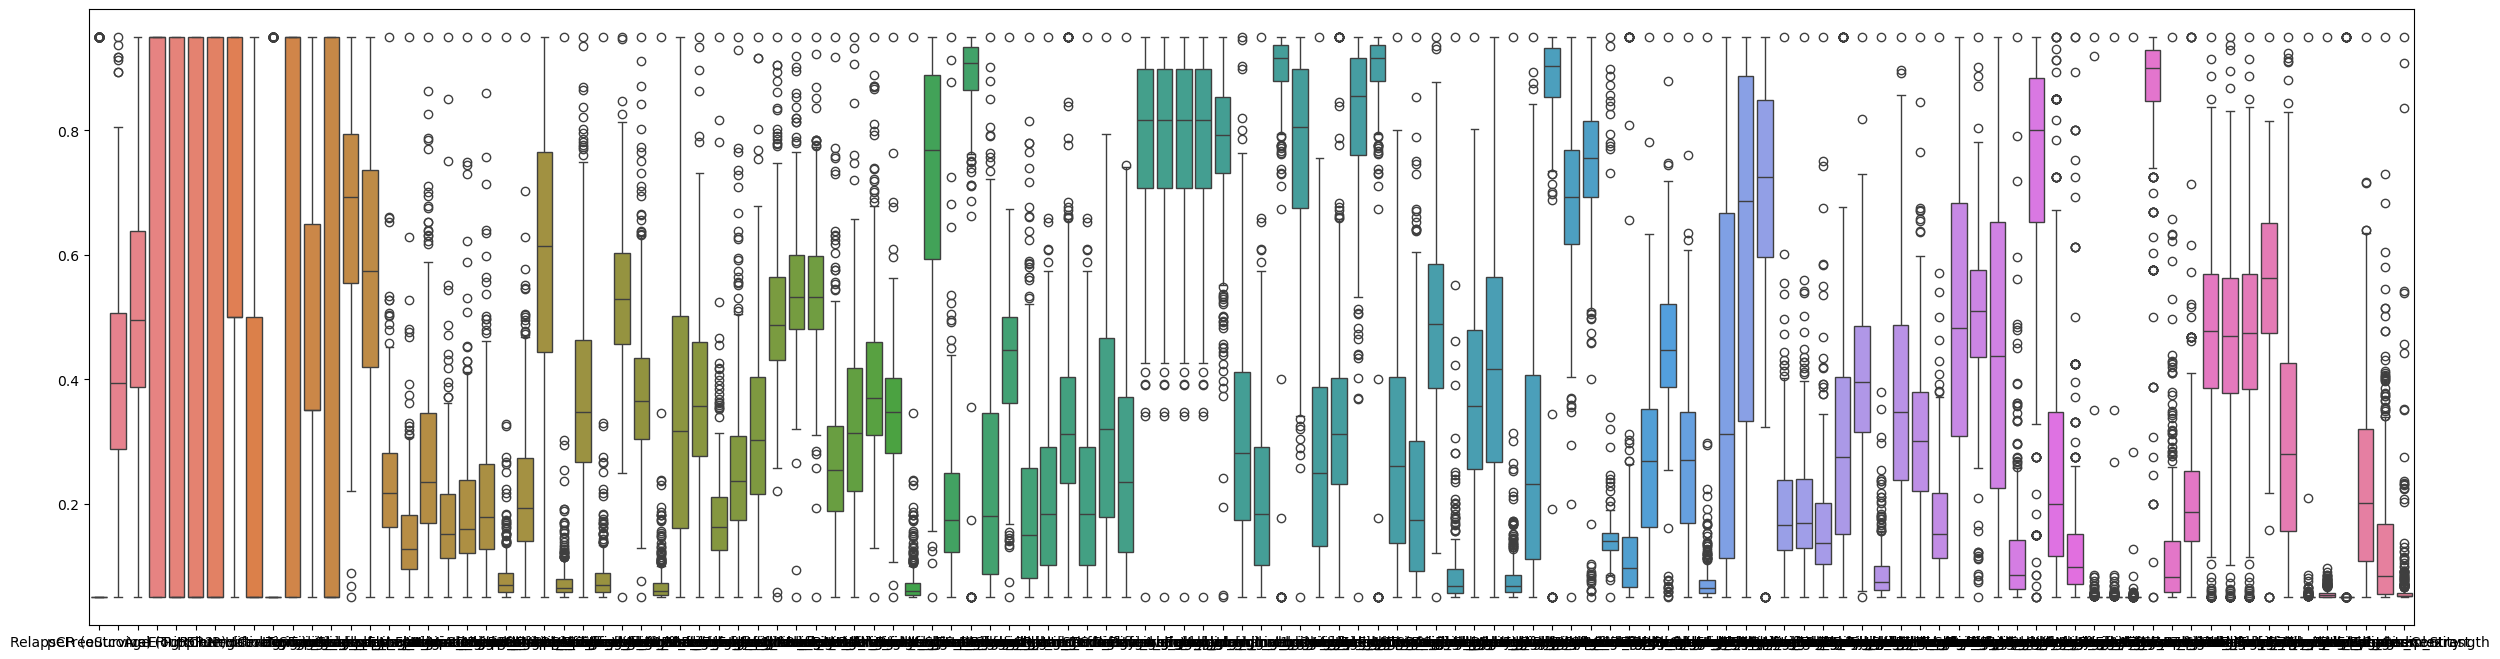

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.05,0.95), clip=False)
scaler.set_output(transform="pandas")
Xs = scaler.fit_transform(X)

from matplotlib import pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,figsize=(30,8))
sns.boxplot(data=Xs,ax=ax)

In [5]:
#seperating results and data

y = X["pCR (outcome)"]

Xs = Xs.drop(["pCR (outcome)", "RelapseFreeSurvival (outcome)"], axis=1)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 1, stratify = y)

print(y)

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: pCR (outcome), Length: 395, dtype: float64


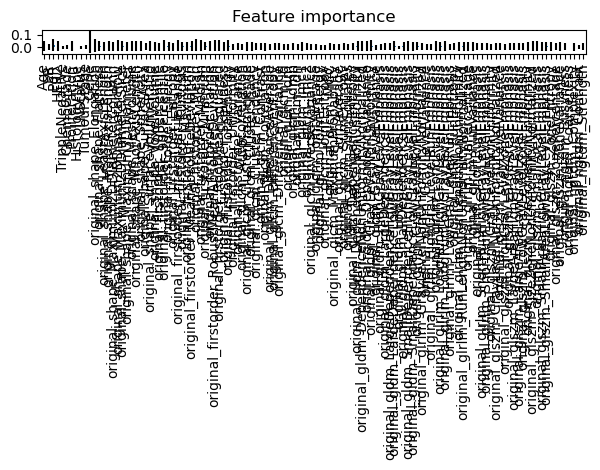

In [6]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs=-1)

rnd_clf.fit(Xs_train, y_train)

importances = rnd_clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0) 

feature_names=Xs_train.columns

forest_importances = pd.Series(importances, index=feature_names) 
fig, ax = plt.subplots() 
forest_importances.plot.bar(yerr=std, ax=ax) 
ax.set_title("Feature importance") 
fig.tight_layout() 

In [7]:
#Sorting fields by importance
sorted_importances = forest_importances.sort_values(ascending=False)

print(sorted_importances)

Gene                                               0.042698
original_shape_Elongation                          0.017978
PgR                                                0.017537
original_firstorder_Mean                           0.016471
original_firstorder_RobustMeanAbsoluteDeviation    0.016159
                                                     ...   
ChemoGrade                                         0.001495
TrippleNegative                                    0.001448
LNStatus                                           0.001109
HistologyType                                      0.000000
original_ngtdm_Coarseness                          0.000000
Length: 118, dtype: float64


In [10]:
#number of features to keep
num_features = 10

#features we need to keep
req_features = ["Gene", "ER", "HER2"]

req_importances = sorted_importances[req_features]

#take 'num_features - 3' off front of sorted_importances

remaining_importances = sorted_importances.drop(req_features)

reduced_importances = remaining_importances[:(num_features-3)]



#combine into single series
reduced_importances = pd.concat([req_importances, reduced_importances])

print(reduced_importances)

Gene                                               0.042698
ER                                                 0.004220
HER2                                               0.012381
original_shape_Elongation                          0.017978
PgR                                                0.017537
original_firstorder_Mean                           0.016471
original_firstorder_RobustMeanAbsoluteDeviation    0.016159
original_firstorder_InterquartileRange             0.016155
original_firstorder_90Percentile                   0.014790
original_shape_Flatness                            0.014415
dtype: float64


In [13]:
#reduce Xs to just the selected features
reduced_Xs = Xs[reduced_importances.index]

print(reduced_Xs)

     Gene    ER  HER2  original_shape_Elongation   PgR  \
0    0.95  0.05  0.05                   0.767568  0.05   
1    0.05  0.95  0.05                   0.610363  0.95   
2    0.95  0.05  0.05                   0.587988  0.05   
3    0.95  0.05  0.05                   0.721755  0.05   
4    0.95  0.95  0.05                   0.817690  0.05   
..    ...   ...   ...                        ...   ...   
395  0.05  0.95  0.95                   0.316067  0.05   
396  0.05  0.05  0.05                   0.875776  0.05   
397  0.05  0.05  0.05                   0.600915  0.05   
398  0.05  0.95  0.05                   0.848793  0.05   
399  0.05  0.95  0.05                   0.396409  0.05   

     original_firstorder_Mean  \
0                    0.221147   
1                    0.523818   
2                    0.444805   
3                    0.520771   
4                    0.442529   
..                        ...   
395                  0.515304   
396                  0.394477   
397   